In [127]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [128]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS_Toronto_emotional_speech_set_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [129]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS_Toronto_emotional_...,angry
1,/content/drive/MyDrive/TESS_Toronto_emotional_...,angry
2,/content/drive/MyDrive/TESS_Toronto_emotional_...,angry
3,/content/drive/MyDrive/TESS_Toronto_emotional_...,angry
4,/content/drive/MyDrive/TESS_Toronto_emotional_...,angry


import numpy as np
from google.colab import autoviz
df_6009445981074981352 = autoviz.get_df('df_6009445981074981352')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6009445981074981352, *['speech'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6009445981074981352 = autoviz.get_df('df_6009445981074981352')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6009445981074981352, *['speech'], **{})
chart

In [130]:
df['label'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: label, dtype: int64

In [131]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

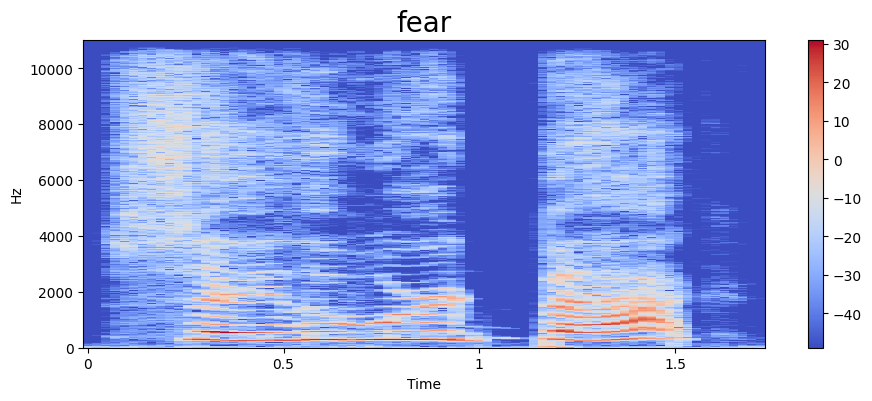

In [132]:
emotion ='fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
plt.show(sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

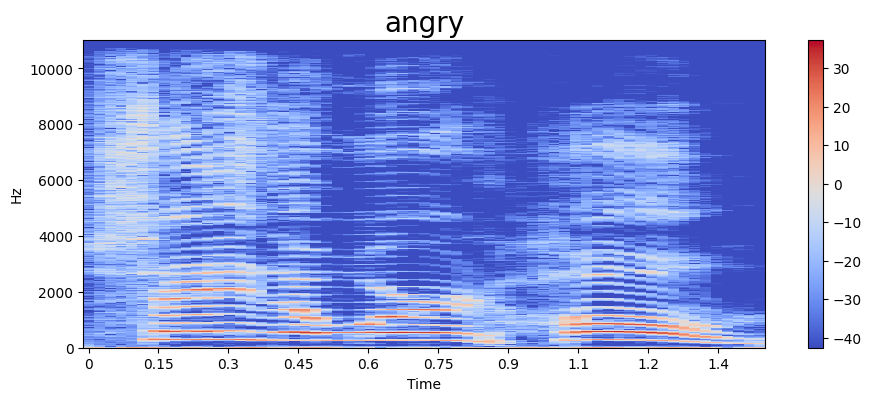

In [133]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
plt.show(sampling_rate,emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

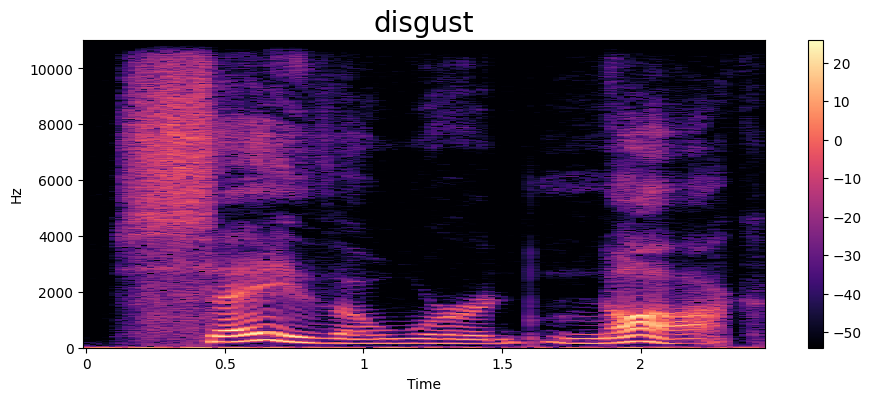

In [134]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
plt.show(sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

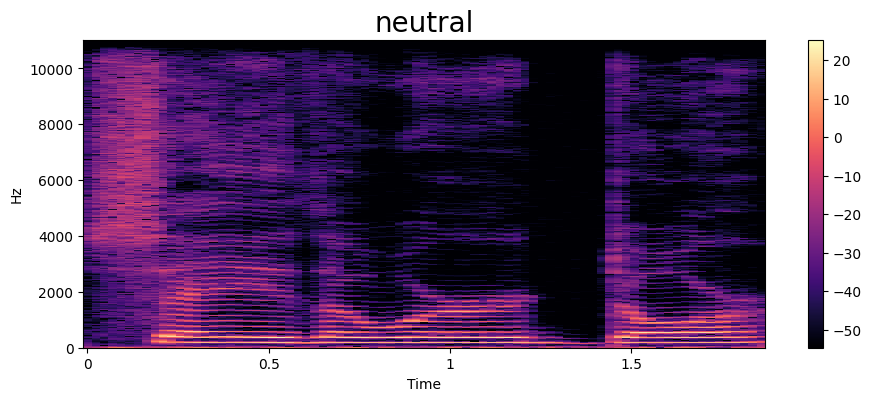

In [135]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
plt.show(sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

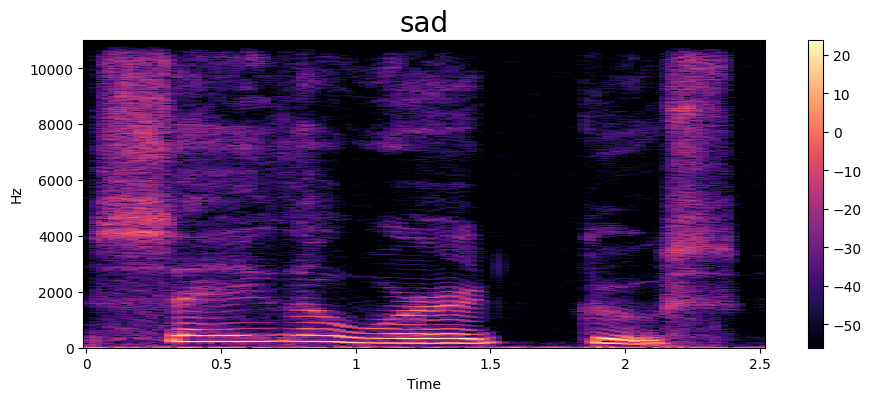

In [136]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
plt.show(sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

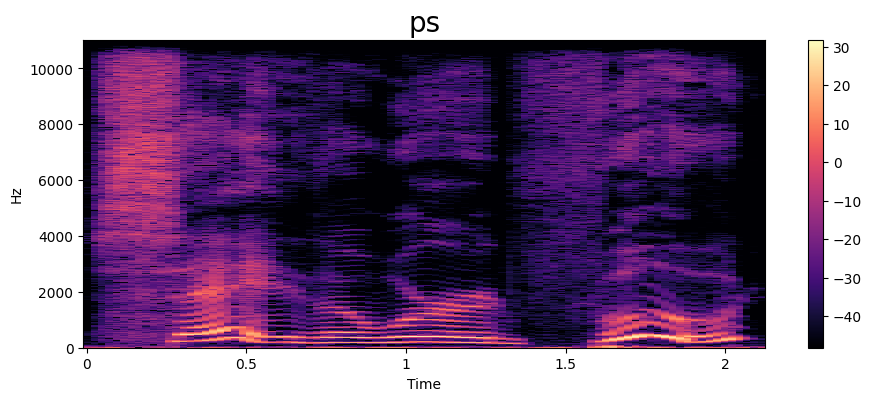

In [137]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
plt.show(sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

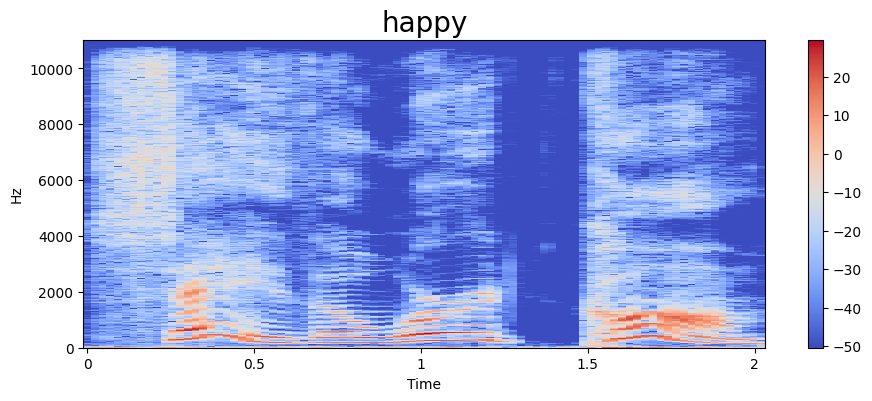

In [138]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
plt.show(sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [139]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [140]:
extract_mfcc(df['speech'][0])

array([-467.83038   ,   92.1703    ,    5.8891497 ,   -9.331062  ,
         -4.825911  ,    7.530056  ,   -7.7310452 ,  -12.979756  ,
        -14.048797  ,   -4.163393  ,   -9.547978  ,   10.712539  ,
         -6.8759465 ,   -1.9237354 ,   -0.5306788 ,    0.5927471 ,
         -7.4698653 ,   -2.7269776 ,   -6.0151772 ,   -7.0877776 ,
         -4.236726  ,   -4.7104564 ,   -4.4352937 ,    1.8009695 ,
          0.9879852 ,   15.020197  ,   12.418456  ,   25.589998  ,
         19.733234  ,   16.840998  ,    8.435127  ,    8.203916  ,
          8.84204   ,    9.168883  ,    6.830575  ,    1.702426  ,
          0.81202656,   12.759999  ,    3.5714948 ,    5.6357927 ],
      dtype=float32)

In [141]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [142]:
X_mfcc

0       [-467.83038, 92.1703, 5.8891497, -9.331062, -4...
1       [-399.07562, 104.1401, -1.9816839, -14.869879,...
2       [-379.18195, 77.70923, -10.372037, -5.453776, ...
3       [-428.47537, 102.57111, 0.7442234, -52.304916,...
4       [-449.09952, 88.260605, -11.881131, -11.472218...
                              ...                        
5595    [-414.1779, 77.80663, 17.454195, 36.707577, 2....
5596    [-413.57156, 90.4645, 17.428688, 27.77821, 0.9...
5597    [-400.08893, 83.61687, 40.39515, 24.708467, -0...
5598    [-441.02573, 101.10122, 30.86512, 40.541813, 1...
5599    [-407.01517, 97.73453, 22.763187, 30.531254, -...
Name: speech, Length: 5600, dtype: object

In [143]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [144]:
## input split
X = np.expand_dims(X, -1)
X.shape


(5600, 40, 1)

In [145]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(5600, 7)

In [146]:
#creating LSTM Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [147]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 9s 611ms/step - loss: 1.8745 - accuracy: 0.2085 - val_loss: 1.7237 - val_accuracy: 0.4500
Epoch 2/100
9/9 [==============================] - 3s 312ms/step - loss: 1.6632 - accuracy: 0.3424 - val_loss: 1.4741 - val_accuracy: 0.4187
Epoch 3/100
9/9 [==============================] - 3s 315ms/step - loss: 1.3300 - accuracy: 0.5533 - val_loss: 1.0828 - val_accuracy: 0.5616
Epoch 4/100
9/9 [==============================] - 3s 313ms/step - loss: 0.9137 - accuracy: 0.6801 - val_loss: 0.7047 - val_accuracy: 0.6232
Epoch 5/100
9/9 [==============================] - 4s 433ms/step - loss: 0.6790 - accuracy: 0.7420 - val_loss: 0.4384 - val_accuracy: 0.8214
Epoch 6/100
9/9 [==============================] - 4s 393ms/step - loss: 0.5317 - accuracy: 0.8058 - val_loss: 0.3554 - val_accuracy: 0.8545
Epoch 7/100
9/9 [==============================] - 3s 303ms/step - loss: 0.4223 - accuracy: 0.8498 - val_loss: 0.2455 - val_accuracy: 0.9259
Epoch 8/100
9

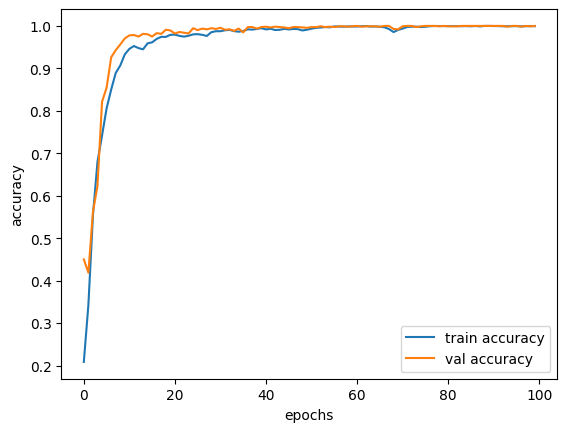

In [151]:
#ploting results
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc,label='train accuracy')
plt.plot(val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

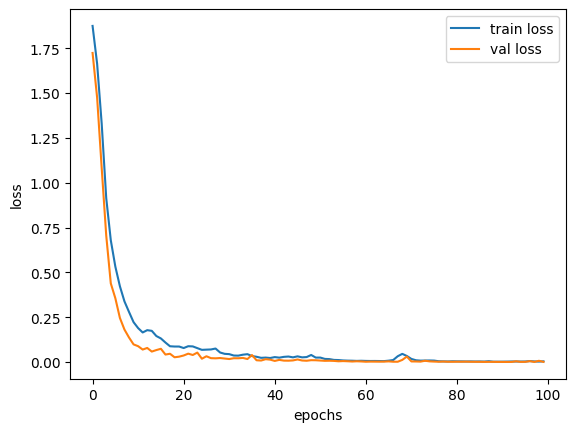

In [152]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()